# Практическая работа №2: Исследование однородного линейного уравнения с периодическими коэффициентами.

Выполнила студентка гр. 9381 Андрух Ирина, вариант 1.

## Цель работы

Изучение устойчивости однородного линейного уравнения с периодическими коэффициентами при $t \rightarrow +\infty$.


## Основные теоретические положения

Системой однородных линейных дифференциальных уравнений с периодическими коэффициентами называется система однородных линейных ОДУ следующего вида:

$$ X' = A(t) X, \;\; A(t + T) = A(t), \;\; t \ge 0 \;\;\;\;\;\;\;\; (0) $$
$$ X' = (x_1', \dots, x_n')^T, \;\; X = (x_1, \dots, x_n)^T, \;\; A(t) = || a_{ij}(t) ||, \;\; a_{ij}(t + T) = a_{ij}(t)$$

Число $T > 0$ называют периодом коэффициентов системы $(0)$.

Фундаментальной матрицей системы $(0)$ называется такая матрица $\Phi(t)$, что ее стобцы являются линейно независимыми решениями системы $(0)$. В матричном виде: $\Phi' = A(t)\Phi$.

Основной матрицей для фундаментальной матрицы $\Phi(t)$ называется такая матрица $C$, что $\Phi(t + T) = \Phi(t)C, \; \forall t \ge 0$.

Спектральным радиусом матрицы $C$ называется число $r(C) = \max\limits_{i}|\lambda_i|$, где $\lambda_i$ - собственные числа матрицы $C$.

## Постановка задачи

Дано дифференциальное уравнение:

$$ x'' + a(p,t)x = 0, \;\; a(p,t) = p + b(t), \;\; b(t + T) = b(t), $$

где $p$ - параметр.

Данное уравнение сводится к системе двух уравнений I-го порядка:

$$
\begin{cases}
    u'_1 = u_2, \\
    u'_2 = -a(p,t)u_1;
\end{cases}
\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; (1)
$$

Здесь $u_1(t) = x(t), \; u_2(t) = x'(t)$.

Необходимо провести исследование устойчивости однородного линейного уравнения. Дальнейшие рассуждения применимы к любой линейной периодической системе, а не только к системе вида $(1)$.

## Схема решения

1. Задаем массив значений параметра $p$. Например, $p$ меняется от $0.1$ до $5$ с шагом $0.05$. Для каждого значения $p$ проделаем следующие действия:

2. Вычисляем значение фундаментальной матрицы системы $(1)$ при $t = T$ с помощью любой программы численного решения задачи
Коши.
Для этого решаем две задачи Коши с начальными векторами $V_1 = (1, 0)^T$ и $V_2 = (0, 1)^T$ на отрезке $[0, T]$. Пусть вектор-функции $U(t, V_1), \; U(t, V_2)$ – решения этих задач. Они являются столбцами фундаментальной матрицы $\Phi(t)$, удовлетворяющей условию $\Phi(0) = E$. Основную матрицу $C$ для $\Phi(t)$ получаем из формулы $C = \Phi(T)$.
Столбцы матрицы $C$ это векторы $U(T, V_1), U(T, V_2)$;

3. Вычисляем собственные числа матрицы 𝐶 и ее спектральный радиус, т.е.
$$ r(p) = \max\limits_{j = 1,2}|\lambda_j|.$$
В результате имеем массив значений $r(p)$;

4. Вывод об устойчивости или неустойчивости делается в зависимости от значения $r(p)$.

Рекомендуется построить график этой зависимости, из которого с достаточной точностью можно определить точку 𝑝0, которая разделяет зоны устойчивости и неустойчивости, в которых $r \le 1$ и $r \gt 1$. Более точно
вычисляется методом половинного деления.

Матрицу $C$ можно найти только приближенно, решая численно две задачи Коши.

## Выполнение работы

### Вариант 1

Функция $b(t)$ задана следующим выражением:

$$ b(t) = ln(2 - sin(2t)) $$

Подключение библиотек:

In [2]:
from math import log, sin, pi
from matplotlib.pyplot import grid, legend, plot, xlabel, ylabel
from numpy import arange, array
from numpy.linalg import eigvals
from scipy import integrate

%matplotlib inline

Объявим функции $b(t)$ и $a(p,t)$, а также их период $T = \pi$:

In [3]:
def b(t):
    return log(2 - sin(2 * t))

def a(p, t):
    return p + b(t)

T = pi

График функции $b(t)$ имеет следующий вид ($t \in [-T, T]$):

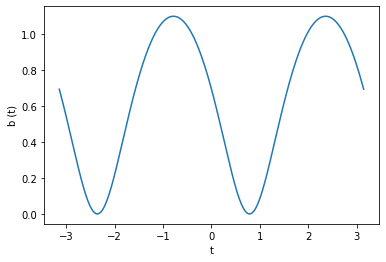

In [4]:
t_values = arange(-T, T, 0.001)
b_values = [b(t) for t in t_values]

xlabel("t")
ylabel("b (t)")
plot(t_values, b_values)

Зададим массив значений параметра $p$ из промежутка $[0, 10]$ с шагом $0.001$:

In [5]:
left = 0
right = 10
step = 0.001

p_values = arange(left, right + step, step)

Для каждого параметра $p$ найдем спектральный радиус основной матрицы $C$. Для этого сначала находится фундаментальная матрица $\Phi(p, t)$, удовлетворяющей условию  $\Phi(p, 0) = E$. Далее находится основная матрица $C(p) = \Phi(p, T)$ и ее спектральный радиус $r(p)$:

In [6]:
interval = (0, T)
v_1 = (1, 0)
v_2 = (0, 1)
sr_values = []

for p in p_values:
    de_system_func = lambda t, values: [values[1], -a(p, t) * values[0]]
    u1 = integrate.solve_ivp(de_system_func, interval, v_1)
    u2 = integrate.solve_ivp(de_system_func, interval, v_2)
    c = array([[u1.y[0][-1], u2.y[0][-1]],
               [u1.y[1][-1], u2.y[1][-1]]])
    sr = max(abs(eigvals(c)))
    sr_values.append(sr)

Построим график спектрального радиуса основной матрицы при различных параметрах $p$:

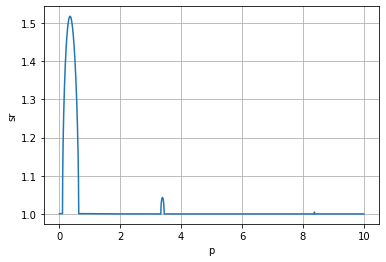

In [7]:
xlabel("p")
ylabel("sr")
plot(p_values, sr_values)
grid(True)

Определим точку $p_0$ с точностью $|r(p_0) - 1| < 0.001$:

In [8]:
p0 = None
rp0 = None

for i in range(1, len(sr_values)):
    if abs(sr_values[-i] - 1) > 0.001:
        p0 = p_values[-i + 1]
        rp0 = sr_values[-i + 1]
        break

print("p0 = {}, r(p0) = {}".format(p0, rp0))

p0 = 8.385, r(p0) = 1.0004243306405414


Построим график спектрального радиуса основной матрицы при различных параметрах $p$ с отмеченной на нем точкой $p_0$:

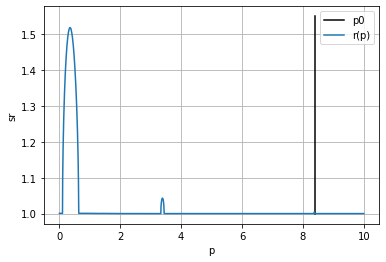

In [9]:
xlabel("p")
ylabel("sr")
plot([p0, p0], [0.999, 1.55], color="black", label="p0")
plot(p_values, sr_values, label="r(p)")
grid(True)
legend()

Рассмотрим промежуток $p \in [8.3, 8.4]$ поближе:

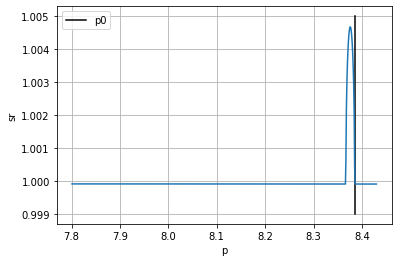

In [27]:
xlabel("p")
ylabel("sr")
plot([p0, p0], [0.999, 1.005], color="black", label="p0")
plot(p_values[-int(2.2 / step):-int(1.57 / step)], sr_values[-int(2.2 / step):-int(1.57 / step)])
grid(True)
legend()

Можно сделать вывод о том,что граница между зонами устойчивости и неустойчивости равна $p_0 = 8.385$. При значениях $p < p_0$ наблюдаются области со значением $r(p) > 1$. При таких значениях $p$ по крайней мере часть решений системы не ограничена. 

## Выводы

При выполнении практической работы была изучена устойчивость системы однородных линейных ОДУ с переодическими коэффициетами при $t \rightarrow +\infty$. Найдена граница зоны устойчивости и неустойчивости $p_0 = 8.385$, сделаны выводы об устойчивости системы при $p >= p_0 = 8.385$ и неустойчивости системы при $p < p_0 = 8.385$. Значение $p_0$ найдено с точностью $|r(p_0) - 1| < 0.001$.